<a href="https://colab.research.google.com/github/alanrolemberg/mvp/blob/main/MachineLearningMVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pontifícia Universidade Católica do Rio de Janeiro - PUC - RJ**

**Ano: 2023**

**Sprint: Machine Learning & Analytics (40530010056_20230_01)**

-------------------------------------------------------------------------------

**MVP - Machine Learning**

**Aluno:** ALAN ROLEMBERG ELIODORIO

-------------------------------------------------------------------------------

# Modelo para predição de salários a serem pagos para novos profissionais de área de ciência de dados

**Tipo do problema:** Regressão

**Método:** Algoritmos clássicos de regressão

-------------------------------------------------------------------------------

**Contexto**

Temos um banco de dados com o histórico de **salários pagos** a profissionais de ciência de dados em diversas empresas. Além dos salários, o dataset nos traz informações características de cada vaga, como local de residência do empregado, local da empresa, taxa de trabalho remoto, entre outros dados interessantes. Com base nestes dados, tentaremos **predizer um valor de salário** para novos empregados, ou seja, é um problema de regressão. Este modelo pode ser usado para que empresas ofereçam salários justos (baseados em valor de mercado) para seus novos empregados.

**Estrutura**

O notebook está dividido em:

-  Importação de bibliotecas

-  Carga do dataset original

-  Pré-processamento de dados

-  Carga do dataset pré-processado

-  Divisão entre treinamento e teste

-  Modelagem

-  Avaliação dos modelos no conjunto de treino

-  Avaliação do modelo vencedor no conjunto de teste

-  Processo de feature selection

-  Redução da dimensionalidade (aplicando o feature selection)

-  Nova modelagem (aplicando o feature selection)

-  Avaliação dos modelos no conjunto de treino (aplicando o feature selection)

-  Avaliação do modelo vencedor no conjunto de teste (aplicando o feature selection)

-  Redução da dimensionalidade (corrigindo o feature selection)

-  Nova modelagem (corrigindo o feature selection)

-  Avaliação do modelo vencedor no conjunto de teste (corrigindo o feature selection)

-  Testando a predição

-  Uso do algoritmo de melhor avaliação

-  Otimização de Hiperparâmetros

-  Análise do Plot

-  Persistindo o modelo

-  Recuperando o modelo

-  Conclusões finais

**Dataset**

O dataset ds_salaries foi baixado do Kaggle, através do link [ds_salaries](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj9lvjiu9D_AhU_CLkGHcniBhAQFnoECBQQAQ&url=https%3A%2F%2Fwww.kaggle.com%2Fcode%2Fifeanyies%2Fds-salaries&usg=AOvVaw0AR50DRdSHC8J87Xz6Qy3C&opi=89978449) .

**1. Importação das bibliotecas:** Vamos importar as bibliotecas necessárias para os trabalhos a serem executados.

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

**2. Carga do dataset original:** Carregamos o dataset original de forma visualizar as colunas que compõem este dataset, e verificar se ele pode ser utilizado.

In [2]:
# Carga do dataset não tratado
url = 'http://raw.githubusercontent.com/alanrolemberg/mvp/main/ds_salaries_prepared.csv'

# Carga do dataset não tratado
df_orig = pd.read_csv(url,delimiter=';',)

# Exibição das primeiras linhas do dataset
df_orig.head()


,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary,salary_in_usd
0,2023,SE,FT,Principal Data Scientist,EUR,ES,100,ES,L,80000,85847
1,2023,MI,CT,ML Engineer,USD,US,100,US,S,30000,30000
2,2023,MI,CT,ML Engineer,USD,US,100,US,S,25500,25500
3,2023,SE,FT,Data Scientist,USD,CA,100,CA,M,175000,175000
4,2023,SE,FT,Data Scientist,USD,CA,100,CA,M,120000,120000


 **3. Pré-processamento dos dados:** Nosso problema é de regressão. NEste tipo de problema, para conseguirmos lidar com colunas do tipo texto, vamos convertê-las para pesos e/ou numerações que representem as categorias.

O atributo "Tamanho da empresa" será substituído pelos pesos a seguir: Pequena (Peso 5), Média (Peso 25), Grande (Peso 100).

Os atributos "País da empresa", "País do empregado", "Tipo de contratação" e "Nome do cargo" serão substituídos por codificações.

>**Observação importante:** Tentamos fazer uso do "OneHotEncoding" e do "GetDummies" para evitar as substituições citadas acima, mas chegamos a conclusão de que a conversão para colunas binárias nos traria prejuízos na hora de se executar o processo de "Feature Selection", devido ao fato de que este processo "quebra" o atributo em vários atributos, modificando a condição da análise que é feita pelos algoritmos de "Feature Selection". Portanto, usamos a abordagem de substituição de variáveis por códigos ou pesos.

Removemos o atributo "salário" devido a redundância, e adotamos o atributo "salário em dólar" como atributo target para garantir uniformidade de medição.

Dessa forma iremos reimportar o dataset tratado para fins de comparação:


**4. Carga do dataset pré-processado:** Manipulamos o dataset via EXCEL para substituição de variáveis categóricas por pesos ou códigos, e geramos este novo dataset que será carregado abaixo.

In [3]:
# Carga do dataset pré-processado
url = 'https://raw.githubusercontent.com/alanrolemberg/mvp/main/ds_salaries_prepared6.csv'

# Carga do dataset pré-processado
df = pd.read_csv(url,delimiter=';')

# Exibição das primeiras linhas do dataset
df.head()

,work_year,Experience_level_coded,employment_type_code,job_title_code,employee_residence,remote_ratio,company_location,company_size_numeric,salary_in_usd
0,2023,3,3,86,65,100,65,100,85847
1,2023,2,1,78,228,100,228,5,30000
2,2023,2,1,78,228,100,228,5,25500
3,2023,3,3,48,36,100,36,25,175000
4,2023,3,3,48,36,100,36,25,120000


**5. Separação em base de treino e testes:**

Separamos nosso conjunto, destinando 80% para a base de treino e 20% para a base de testes.

In [4]:
#Separação em bases de treino e teste (holdout)
array = df.values
X = array[:,0:8]
y = array[:,8] # classe (target)
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

[[2023    3    3 ...  100   65  100]
 [2023    2    1 ...  100  228    5]
 [2023    2    1 ...  100  228    5]
 ...
 [2020    1    3 ...  100  228    5]
 [2020    1    1 ...  100  228  100]
 [2021    3    3 ...   50  103  100]]


**6. Modelagem:**

Criamos nosso modelo e adicionamos 5 algoritmos de regressão para gerar as análises do modelo. A métrica para avaliação dos modelos será o erro quadrático médio, através do método de validação cruzada.

LR: MSE 2992400074.39 (403308434.59) - RMSE 54702.83
Ridge: MSE 2992270706.35 (403138735.34) - RMSE 54701.65
Lasso: MSE 2992356821.02 (403255496.92) - RMSE 54702.44
KNN: MSE 2946590872.46 (420224324.38) - RMSE 54282.51
CART: MSE 2951575054.03 (369578566.93) - RMSE 54328.40
SVM: MSE 4018742618.61 (465318464.50) - RMSE 63393.55


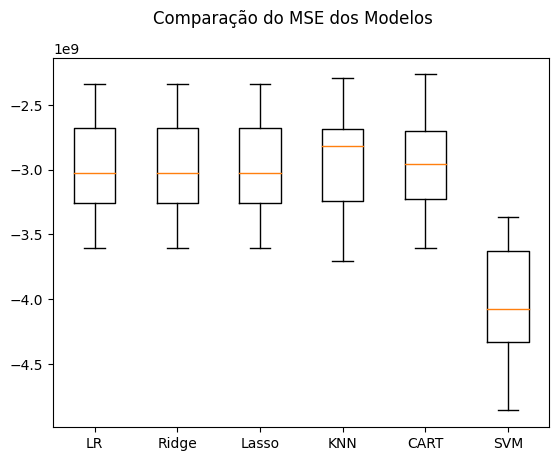

In [5]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)


# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

>**DESCOBERTA:** O KNN é o modelo que trouxe melhor performance com este DATASET.



**7. Avaliação dos modelos no conjunto de treino:**
-  O KNN é o modelo que trouxe melhor performance com o conjunto de teste, trazendo um menor erro quadrático em relação aos demais, mas com valores próximos aos algoritmos LR, Ridge, Lasso e CART.
- o SVM é o modelo que trouxe a pior performance com o conjunto de teste, trazendo um maior erro quadrático em relação aos demais.

**8. Avaliação do modelo vencedor com todo o conjunto de teste:**

In [6]:
# Criando um modelo com todo o conjunto de treino
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 2737845613.44
RMSE 52324.43


>**DESCOBERTA:** O valor do RMSE melhorou quando submetido ao conjunto de teste.

**8. Processo de feature selection**

**8.1 Importação de bibliotecas**

In [7]:
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos

**8.2 Uso do SelectKBest**

In [8]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", df.columns[0:8])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=df.columns[0:8]))


Número original de atributos: 8

Número reduzido de atributos: 4

Atributos Originais: Index(['work_year', 'Experience_level_coded', 'employment_type_code',
       'job_title_code', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size_numeric'],
      dtype='object')

Scores dos Atributos Originais: [3.013 2.919 2.756 1.911 8.981 2.    9.421 3.408]

Atributos Selecionados: ['work_year' 'employee_residence' 'company_location'
 'company_size_numeric']


>**DESCOBERTA:** Este algoritmo classificou os atributos ['work_year' 'employee_residence' 'company_location'
 'company_size_numeric'] como os mais importantes.

**8.2 Uso do RFE**

In [9]:
# Eliminação Recursiva de Atributos (RFE)

# Criação do modelo
modelo = LogisticRegression(max_iter=100)

# Descobrir 3 atributos com maior influência nos resultados
rfe = RFE(modelo, n_features_to_select=3)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", df.columns[0:8])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados como melhores: %s" % fit.get_feature_names_out(input_features=df.columns[0:8]))

Atributos Originais: Index(['work_year', 'Experience_level_coded', 'employment_type_code',
       'job_title_code', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size_numeric'],
      dtype='object')

Atributos Selecionados: [False False False  True False  True False  True]

Ranking de atributos: [4 5 6 1 2 1 3 1]

Qtd de melhores Atributos: 3

Nomes dos Atributos Selecionados como melhores: ['job_title_code' 'remote_ratio' 'company_size_numeric']


>**DESCOBERTA:** Este algoritmo classificou os atributos ['job_title_code' 'remote_ratio' 'company_size_numeric'] como os mais importantes.

**8.3 Uso de ExtraTrees**

In [10]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", df.columns[0:8])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)

print(" O melhor atributo tem importancia de: ",max(modelo.feature_importances_))


Atributos Originais: Index(['work_year', 'Experience_level_coded', 'employment_type_code',
       'job_title_code', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size_numeric'],
      dtype='object')
[0.121 0.073 0.019 0.425 0.124 0.055 0.116 0.067]
 O melhor atributo tem importancia de:  0.4251627715682816


>**DESCOBERTA:** Este algoritmo classificou o atributo ['job_title_code'] como o mais importante.

**9. Redução da dimensionalidade (aplicando o feature selection)**

Dentro do estudado, vamos então refazer a predição nos baseando apenas nos atributos mais importantes.

Descartaremos os atributos a seguir, que foram mostrados como menos importantes por alguns dos algoritmos:
- experience_level_coded
- employment_type_code
- remote_ratio


In [11]:
#Separação em bases de treino e teste (holdout)
array2 = df.values
# Concatenando apenas as colunas com os atributos selecionados
X2 = np.column_stack((array2[:,0],array2[:,3],array2[:,4],array2[:,6],array2[:,7])) # aqui estão sendo descartados os atributos teoricamente piores
y2 = array2[:,8] # classe (target)
print(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

[[2023   86   65   65  100]
 [2023   78  228  228    5]
 [2023   78  228  228    5]
 ...
 [2020   48  228  228    5]
 [2020   18  228  228  100]
 [2021   46  103  103  100]]


***10. Modelagem nova (aplicando a feature selection) ***

LR: MSE 3123465058.88 (387247377.00) - RMSE 55887.97
Ridge: MSE 3123464428.76 (387265732.97) - RMSE 55887.96
Lasso: MSE 3123464979.46 (387251245.21) - RMSE 55887.97
KNN: MSE 3104259693.94 (391861136.10) - RMSE 55715.88
CART: MSE 2904858721.84 (344994540.70) - RMSE 53896.74
SVM: MSE 4018711724.46 (465317281.71) - RMSE 63393.31


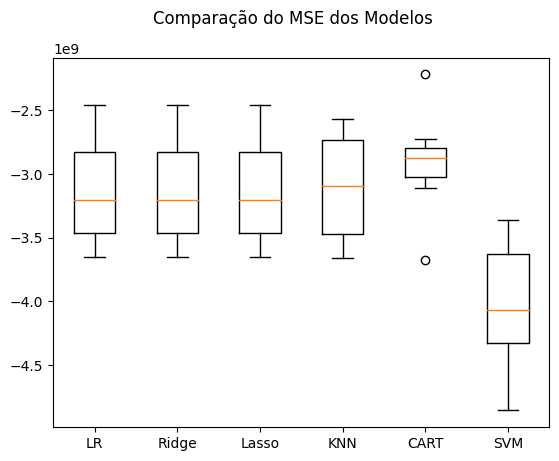

In [12]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train2, y_train2, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)


# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

>**DESCOBERTA:** Nesta nova modelagem, após feature selection, o CART (Árvore de descisão) superou o KNN, demonstrando uma menor média no erro quadrático.



**11. Avaliação dos modelos no conjunto de treino:**
- o CART foi o modelo que obteve o melhor desempenho após executada a redução de dimensionalidade, superando o KNN.
- O SVM continua sendo o pior modelo mesmo após a redução de dimensionalidade.

**12. Avaliação do modelo vencedor no conjunto de testes:** Vamos realizar agora o treino do modelo com o conjunto de treino e submeter ele a predições no novo conjunto de teste, para fins de comparação.

In [13]:
# Criando um modelo com todo o conjunto de treino
model = DecisionTreeRegressor()
model.fit(X_train2, y_train2)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test2)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test2, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 2817821970.17
RMSE 53083.16


>**PIORA NO DESEMPENHO:** O resultado global na avaliação da base de testes completa piorou após remover os atributos selecionados por feature selection, pois o erro quadrático médio que era de 52324 (sem feature selection) e subiu para 53083 (após feature selection). A avaliação que fazemos é que o processo de feature selection da forma realizada não melhorou o modelo, e devem ser realizadas novas tentativas com remoção de outros arranjos de atributos. Em último caso, deve ser usada a integralidade dos atributos, de forma a obter o melhor desempenho.

**13. Redução da dimensionalidade (corrigindo o feature selection)**

Para essa correção, vamos considerar 2 fatores:
- A saída dos algoritmos "Extra Trees" e "SelectKBest" considera que dos 3 atributos menos importantes, o "Experience_level_coded" é o mais importante.
- Essa saída também corresponde ao feeling pessoal ao analisar os dados. O nível de experiência do empregado sempre vai estar em algum grau relacionado ao salário recebido.

Então consideraremos desta vez a remoção de apenas 2 atributos:
- employment_type_code
- remote_ratio


In [14]:
#Separação em bases de treino e teste (holdout)
array2 = df.values
# Concatenando apenas as colunas com os atributos selecionados
X2 = np.column_stack((array2[:,0],array2[:,1],array2[:,3],array2[:,4],array2[:,6],array2[:,7])) # aqui estão sendo descartados os atributos teoricamente piores
y2 = array2[:,8] # classe (target)
print(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

[[2023    3   86   65   65  100]
 [2023    2   78  228  228    5]
 [2023    2   78  228  228    5]
 ...
 [2020    1   48  228  228    5]
 [2020    1   18  228  228  100]
 [2021    3   46  103  103  100]]


**14. Nova modelagem (Corrigindo o feature selection)**

LR: MSE 2984847659.78 (395222327.46) - RMSE 54633.76
Ridge: MSE 2984845028.58 (395209817.49) - RMSE 54633.74
Lasso: MSE 2984847616.38 (395221293.23) - RMSE 54633.76
KNN: MSE 3074565589.09 (409560009.02) - RMSE 55448.77
CART: MSE 2880621040.64 (442313587.80) - RMSE 53671.42
SVM: MSE 4018727738.65 (465317625.99) - RMSE 63393.44


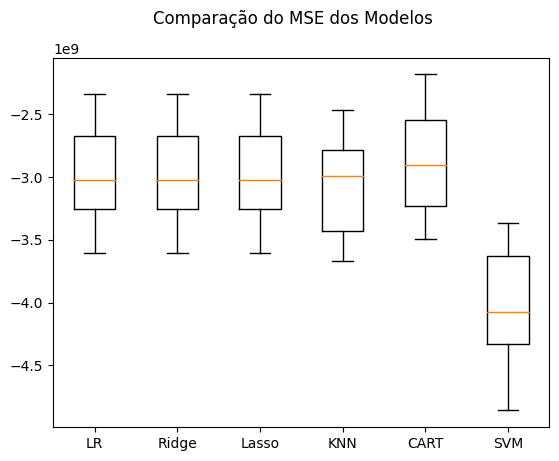

In [15]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train2, y_train2, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)


# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

>**DESCOBERTA:** Nesta nova modelagem, após feature selection corrigida, o CART (Árvore de descisão) continuou com uma menor média no erro quadrático.

**15. Avaliação do modelo vencedor no conjunto de testes:** Vamos realizar agora o treino do modelo com o conjunto de treino e submeter ele a predições no novo conjunto de teste, para fins de comparação.

In [16]:
# Criando um modelo com todo o conjunto de treino
model = DecisionTreeRegressor()
model.fit(X_train2, y_train2)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test2)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test2, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 2682904021.13
RMSE 51796.76


>**MELHORA NO DESEMPENHO:** O resultado global na avaliação da base de testes completa piorou após remover os atributos selecionados por feature selection, pois o erro quadrático médio que era de 52324 (sem feature selection), passou a 53083 (após feature selection), e após esta correção do feature selection, o **erro melhorou**, caindo para 51796 . Essa modelagem será considerada como a final, com redução de dimensionalidade dos 2 piores atributos.

**16. TESTANDO A PREDIÇÃO**

Vamos vistoriar uma amostragem das nossas predições, usando entradas da base de teste e notando o nível de aproximação das previsões de salário dos salários reais.

In [17]:
numbers = range(1,20)
for n in numbers:
  print('Atributos: ',X_test2[n],'| Salário: ', y_test2[n],'| Predição do modelo: ', round(predictions[n],0))


Atributos:  [2022    3   34  228  228   25] | Salário:  135000 | Predição do modelo:  149992.0
Atributos:  [2021    1   71  103  103   25] | Salário:  12171 | Predição do modelo:  20000.0
Atributos:  [2023    3   34  228  228   25] | Salário:  185000 | Predição do modelo:  160141.0
Atributos:  [2022    3   26  228  228   25] | Salário:  150000 | Predição do modelo:  116546.0
Atributos:  [2022    3   34  228  228   25] | Salário:  185900 | Predição do modelo:  149992.0
Atributos:  [2022    1   13   54   54  100] | Salário:  60938 | Predição do modelo:  19073.0
Atributos:  [2022    1   78  181  181  100] | Salário:  21013 | Predição do modelo:  22809.0
Atributos:  [2023    3   34  228  228   25] | Salário:  135000 | Predição do modelo:  160141.0
Atributos:  [2023    3   34  228  228   25] | Salário:  252000 | Predição do modelo:  160141.0
Atributos:  [2023    3   34  228  228   25] | Salário:  165000 | Predição do modelo:  160141.0
Atributos:  [2023    3   48  228  228   25] | Salário:  

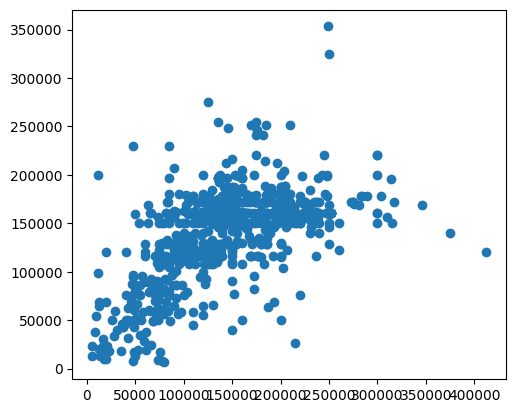

In [18]:
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.scatter(y_test2, predictions)

>**ANÁLISE:** Quanto mais a plotagem acima se aproxima de uma reta, mais preciso está o modelo.


**17. Otimização de hiperparâmetros**

In [19]:
# Imports de Bibliotecas adicionais
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


Usaremos os parâmetros a seguir para o algoritmo de árvore de decisão:
*   'max_depth': [5,10,20,50]
*   'max_leaf_nodes': [1,5,10,20,30,40,50,80,100,500]
*   'min_samples_leaf': [1,5,10,20,40]







In [20]:
# Tuning do DecisionTree

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
cart = ('CART', DecisionTreeRegressor())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('CART-orig', Pipeline(steps=[cart])))
pipelines.append(('CART-padr', Pipeline(steps=[standard_scaler, cart])))
pipelines.append(('CART-norm', Pipeline(steps=[min_max_scaler, cart])))

param_grid = {
    'CART__max_depth': [5,10,20,50],
    'CART__max_leaf_nodes': [1,5,10,20,30,40,50,80,100,500],
    'CART__min_samples_leaf': [1,5,10,20,40]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
    grid.fit(X_train2, y_train2)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: CART-orig - Melhor: -2601685450.219409 usando {'CART__max_depth': 10, 'CART__max_leaf_nodes': 80, 'CART__min_samples_leaf': 10}
Sem tratamento de missings: CART-padr - Melhor: -2601685450.219409 usando {'CART__max_depth': 10, 'CART__max_leaf_nodes': 80, 'CART__min_samples_leaf': 10}
Sem tratamento de missings: CART-norm - Melhor: -2601648629.353733 usando {'CART__max_depth': 10, 'CART__max_leaf_nodes': 80, 'CART__min_samples_leaf': 10}


> ***DESCOBERTA:*** Temos agora os melhores valores para os parâmetros testados (max_depth=10, max_leaf_nodes=40, min_samples_leaf=20), que devem incrementar nossos resultados de predição.

>>**Método comparativo:**
Iremos criar 6 modelos com os nomes e objetivos a seguir:
- model_hp         -> Aplicação de hiperparametros somente
- model_hp_fs      -> Aplicação de hiperparametros e feature selection
- model_hp_padr    -> Aplicação de hiperparametros e padronizacao
- model_hp_padr_fs -> Aplicação de hiperparametros, padronização e feature selection.
- model_hp_norm    -> Aplicação de hiperparametros e normalização
- model_hp_norm_fs -> Aplicação de hiperparametros, normalização e feature selection.

>>A partir deste comparativo, saberemos a melhor opção de configuração do modelo, através da medição do erro médio quadrático de todas as opções.


In [21]:
# Criando um modelo configurado com os HIPER PARAMETROS e sem feature selection
model_hp = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=40, min_samples_leaf=20) # Aplicação dos parametros eleitos para otimização de hiperparametros
model_hp.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
tuned_predictions = model_hp.predict(X_test)

# Estimando o MSE e o RMSE, após otimização de hiperparametros, no conjunto de teste
mse = mean_squared_error(y_test, tuned_predictions)
print("Original sem F.S.    | "+"MSE %0.2f" % mse + "| RMSE %0.2f" % np.sqrt(abs(mse)))




Original sem F.S.    | MSE 2401737199.61| RMSE 49007.52


In [22]:
# Criando um modelo configurado com os HIPER PARAMETROS e com feature selection
model_hp_fs = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=40, min_samples_leaf=20) # Aplicação dos parametros eleitos para otimização de hiperparametros
model_hp_fs.fit(X_train2, y_train2)

# Fazendo as predições com o conjunto de teste
tuned_predictions = model_hp_fs.predict(X_test2)

# Estimando o MSE e o RMSE, após otimização de hiperparametros, no conjunto de teste
mse = mean_squared_error(y_test2, tuned_predictions)
print("Original com F.S.   | "+"MSE %0.2f" % mse + "| RMSE %0.2f" % np.sqrt(abs(mse)))




Original com F.S.   | MSE 2400336482.44| RMSE 48993.23


In [23]:
#------
# Criando um modelo configurado com os HIPER PARAMETROS e PADRONIZADO  e sem feature selection
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
X_train_r = scaler.transform(X_train) # aplicação da padronização no conjunto de treino

model_hp_padr = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=40, min_samples_leaf=20) # Aplicação dos parametros eleitos para otimização de hiperparametros
model_hp_padr.fit(X_train_r, y_train)

# Fazendo as predições com o conjunto de teste padronizado
scaler = StandardScaler().fit(X_test)
X_test_r = scaler.transform(X_test)
tuned_predictions = model_hp_padr.predict(X_test_r)

# Estimando o MSE e o RMSE, após otimização de hiperparametros, no conjunto de teste
mse = mean_squared_error(y_test, tuned_predictions)
print("Padronizado sem F.S. | "+"MSE %0.2f" % mse + "| RMSE %0.2f" % np.sqrt(abs(mse)))


Padronizado sem F.S. | MSE 8701773544.25| RMSE 93283.30


In [24]:
#------
# Criando um modelo configurado com os HIPER PARAMETROS e PADRONIZADO  e com feature selection
scaler = StandardScaler().fit(X_train2) # ajuste do scaler com o conjunto de treino
X_train2_r = scaler.transform(X_train2) # aplicação da padronização no conjunto de treino

model_hp_padr_fs = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=40, min_samples_leaf=20) # Aplicação dos parametros eleitos para otimização de hiperparametros
model_hp_padr_fs.fit(X_train2_r, y_train2)

# Fazendo as predições com o conjunto de teste padronizado
scaler = StandardScaler().fit(X_test2)
X_test2_r = scaler.transform(X_test2)
tuned_predictions = model_hp_padr_fs.predict(X_test2_r)

# Estimando o MSE e o RMSE, após otimização de hiperparametros, no conjunto de teste
mse = mean_squared_error(y_test2, tuned_predictions)
print("Padronizado com F.S. | "+"MSE %0.2f" % mse + "| RMSE %0.2f" % np.sqrt(abs(mse)))

Padronizado com F.S. | MSE 8711894804.36| RMSE 93337.53


In [25]:
#------
# Criando um modelo configurado com os HIPER PARAMETROS e NORMALIZADO e sem feature selection
scaler = MinMaxScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
X_train_r = scaler.transform(X_train) # aplicação da normalização no conjunto de treino

model_hp_norm = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=40, min_samples_leaf=20) # Aplicação dos parametros eleitos para otimização de hiperparametros
model_hp_norm.fit(X_train_r, y_train)

# Fazendo as predições com o conjunto de teste normalizado
scaler = MinMaxScaler().fit(X_test)
X_test_r = scaler.transform(X_test)
tuned_predictions = model_hp_norm.predict(X_test_r)

# Estimando o MSE e o RMSE, após otimização de hiperparametros, no conjunto de teste
mse = mean_squared_error(y_test, tuned_predictions)
print("Normalizado sem F.S. | "+"MSE %0.2f" % mse + "| RMSE %0.2f" % np.sqrt(abs(mse)))

Normalizado sem F.S. | MSE 2456716667.33| RMSE 49565.28


In [26]:
#------
# Criando um modelo configurado com os HIPER PARAMETROS e NORMALIZADO e com feature selection
scaler = MinMaxScaler().fit(X_train2) # ajuste do scaler com o conjunto de treino
X_train2_r = scaler.transform(X_train2) # aplicação da normalização no conjunto de treino

model_hp_norm_fs = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=40, min_samples_leaf=20) # Aplicação dos parametros eleitos para otimização de hiperparametros
model_hp_norm_fs.fit(X_train2_r, y_train2)

# Fazendo as predições com o conjunto de teste normalizado
scaler = MinMaxScaler().fit(X_test2)
X_test2_r = scaler.transform(X_test2)
tuned_predictions = model_hp_norm_fs.predict(X_test2_r)

# Estimando o MSE e o RMSE, após otimização de hiperparametros, no conjunto de teste
mse = mean_squared_error(y_test2, tuned_predictions)
print("Normalizado com F.S. | "+"MSE %0.2f" % mse + "| RMSE %0.2f" % np.sqrt(abs(mse)))

Normalizado com F.S. | MSE 2458167113.45| RMSE 49579.91


>**CONCLUSÕES APÓS OTIMIZAÇÃO DE HIPER PARAMETROS:**
- O uso de HIPER PARAMETROS melhorou o modelo. (Vamos usar) ✅
- O uso de Feature Selection melhorou um pouco o modelo. (Vamos usar) ✅
- O uso de normalização piorou um pouco o modelo. (Não vamos usar) 🚫
- O uso de padronização piorou muito o modelo. (Não vamos usar) 🚫

>**GANHO SIGNIFICATIVO:**
O RMSE caiu de 53083.16 para 48993.23 após otimização de HIPER PARAMETROS e FEATURE SELECTION. ✅

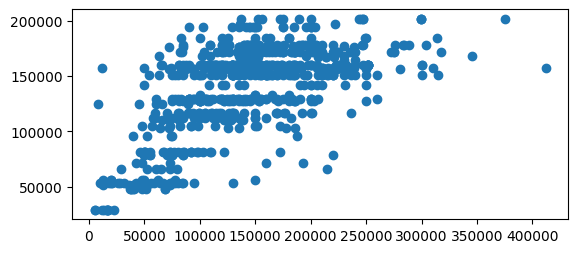

In [27]:
# Plotagem dos resultados após otimização de hiperparametros
tuned_predictions = model_hp_fs.predict(X_test2)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.scatter(y_test2, tuned_predictions)

**18. Análise gráfica:** Quanto mais a plotagem acima se aproxima de uma reta, mais preciso está o modelo, e quanto mais ela se difunde, menos preciso o modelo está (maior é o RMSE).



**19. Persistindo o modelo**



In [28]:
# Salvar modelo para o disco
import pickle
filename = 'finalized_model.sav'
pickle.dump(model_hp_fs, open(filename, 'wb'))


**20. Recuperando o modelo**


In [29]:
# Carregando o modelo e testando o RMSE novamente
loaded_model = pickle.load(open(filename, 'rb'))

loaded_model.fit(X_train2, y_train2)

# Fazendo as predições com o conjunto de teste
tuned_predictions = loaded_model.predict(X_test2)

# Estimando o MSE e o RMSE, após otimização de hiperparametros, no conjunto de teste
mse = mean_squared_error(y_test2, tuned_predictions)
print("Original sem F.S.    | "+"MSE %0.2f" % mse + "| RMSE %0.2f" % np.sqrt(abs(mse)))

Original sem F.S.    | MSE 2400336482.44| RMSE 48993.23


**21. Conclusões finais** ✅



O modelo de regressão para **predição de salários de profissionais de ciência de dados** demonstrou certa eficácia na análise dos dados de mercado, e sugestão de salários de novos profissionais contratados. Essa eficácia conseguiu ser aumentada graças a aplicações de algoritmos de feature selection, que nos apontaram quais campos não estavam ajudando na previsão do modelo. Também utilizamos o processo de otimização de Hiper Parâmetros para achar quais os melhores parâmetros para uso no modelo em questão. Esse modelo poderia ser aperfeiçoado através de outros algoritmos e técnicas estatísticas de forma a diminuir ainda mais o **erro quadrático médio** visto, mas já se demonstra como uma opção interessante para predizer um salário justo a ser pago para um novo profissional ingressante no mercado.